<a href="https://colab.research.google.com/github/MRamsey28/Astro1221/blob/main/CalculationgRotationCurveFortheMilkyWayMaggieRamsey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import astropy.constants as ac # import a Python package to call the value of certain constants
import astropy.units as u #import a python package to call certain units,e.g.,the mass of the Sun.
import numpy as np #imports numpty, which allows up to use mathematical operations for the defined quantities
import matplotlib.pyplot as plt #importing plotting package

In [2]:
def CalculatingOrbitalVelocity(M, R):
    """
    This is a function that calculates the orbital velocity
    Input:
    M, the mass of the object
    R, the radius of the object
    Output:
    V, the orbital velocity of the object
    """
    V = np.sqrt(ac.G*M/R)
    return(V)

In [3]:
# Below we define input M in solar masses
M_bulge = 1e10 * u.solMass
#an array representing the radius for each point on the rotation curve
R_arr = np.arange(1,35) * u.kpc

#calculating the orbital velocity
v_arr = CalculatingOrbitalVelocity(M_bulge, R_arr)
print(v_arr.to(u.km/u.s)) #printing allows you to visualize the values in the array

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177  37.86342681
  37.2477203   36.66110537  36.10136097  35.56649642] km / s


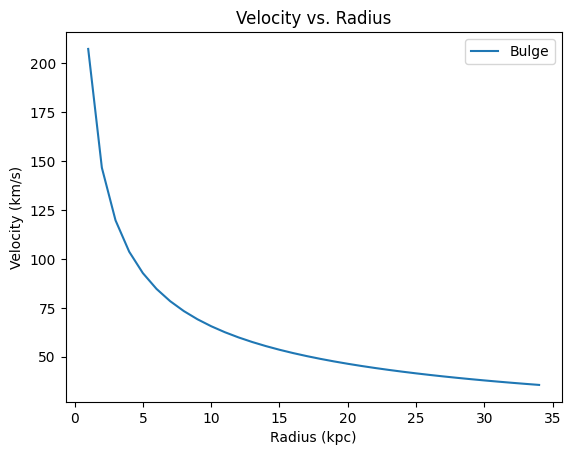

In [4]:
# Create the plot
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), label="Bulge") #plotting velocity vs. orbital radium
plt.xlabel("Radius (kpc)".format(R_arr.unit)) #labels the x axis
plt.ylabel("Velocity (km/s)".format(v_arr.unit)) #labels the y axis
plt.legend() #to show the legend of a figure
plt.title("Velocity vs. Radius") #title of the plot
plt.show()


In [5]:
# Define the disk's total mass (M_disk)
M_disk = 1.25**2 * 1e11 * u.solMass
# Define the outer edge of the disk's radius
R_disk = 10 * u.kpc
#Calculating the density in solar masses per square kpc
density_disk = M_disk/(np.pi*(R_disk**2))
print(density_disk.to(1e6 * u.solMass/u.kpc**2)) #printing the density calculated for future use

497.3591971621729 1e+06 solMass / kpc2


In [6]:
def calculatingEnclosedMassForDisk(R, density=497 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        R = 10 * u.kpc
        M = np.pi * (R**2) * density
    return(M)

In [7]:
print(calculatingEnclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")

1561.3715488341275 1e+06 solMass at 1 kpc
39034.28872085318 1e+06 solMass at 5 kpc


In [8]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=497 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass):
    """
    Note that the halo mass is missing here, so that is what you will work on this Friday
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_bulge = M_bulge
    M_total = M_disk + M_bulge
    return(M_total)

In [9]:
# redefine the bulge orbital velocity array to v_bulge_arr to avoid confusion
v_bulge_arr = CalculatingOrbitalVelocity(M_bulge, R_arr)
print(v_bulge_arr) #printing allows you to visualize the values in the array

[0.81696389 0.57768071 0.47167432 0.40848195 0.36535736 0.33352411
 0.30878333 0.28884035 0.2723213  0.25834667 0.24632388 0.23583716
 0.22658502 0.21834278 0.21093917 0.20424097 0.19814285 0.19256024
 0.18742437 0.18267868 0.17827614 0.17417729 0.17034875 0.16676206
 0.16339278 0.1602198  0.15722477 0.15439166 0.15170639 0.14915652
 0.14673105 0.14442018 0.14221516 0.14010815] m(3/2) solMass(1/2) / (kg(1/2) kpc(1/2) s)


In [10]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_arr)) * u.solMass # Don't forget unit here
M_total = np.zeros(len(R_arr)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = CalculatingOrbitalVelocity(M_disk, R_arr)
v_bulge_disk_arr = CalculatingOrbitalVelocity(M_total, R_arr)

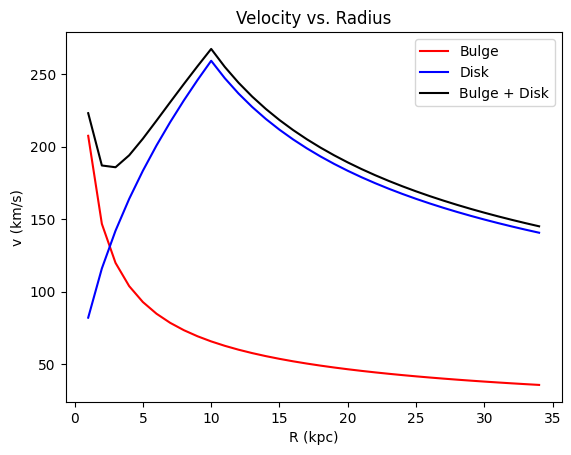

In [11]:
# Plot them all
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)') #label of the x axis
plt.ylabel('v (km/s)') #label of the y axis
plt.title("Velocity vs. Radius") #tiltle of the plot
plt.legend() # to show the legend of a figure
plt.show()

In [12]:
# Define the halo's total mass (M_halo)
M_halo = 1e12 * u.solMass #is this the correct mass of the halo??? Also is the disk mass right, google says its 9e10 not 1e11
# Define the outer edge of the halo's radius
R_halo = 52 * u.kpc
#Calculating the density in solar masses per square kpc
density_halo = M_halo/(4/3 * np.pi*(R_halo**3))
print(density_halo.to(1e6 * u.solMass/u.kpc**3)) #printing the density for future use

1.6978579784780599 1e+06 solMass / kpc3


In [13]:
def calculatingEnclosedMassForHalo(R, density=1.70 * 1e6 * u.solMass/u.kpc**3):
    """
    Calculate enclosed mass for the Halo component
    Input: R - orbital radius, density - density of the halo as calculated above
    Output: M - enclosed mass
    """

    M = 4/3 * np.pi * (R**3) * density
    return(M)

In [14]:
print(calculatingEnclosedMassForHalo(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForHalo(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")

7.120943348136865 1e+06 solMass at 1 kpc
890.1179185171083 1e+06 solMass at 5 kpc


In [15]:
def calculatingEnclosedMassForMilkyWay(R, density_halo=1.70 * 1e6 * u.solMass/u.kpc**3, density_disk=497 * 1e6 * u.solMass/u.kpc**2, M_halo = 1e12 * u.solMass):
    #same function as for the disk, just for the halo
    M_disk = calculatingEnclosedMassForDisk(R)
    M_halo = calculatingEnclosedMassForHalo(R)
    M_total = M_disk + M_bulge +M_halo
    return(M_total)
calculatingEnclosedMassForMilkyWay(R_halo) # printing the value to visualise it

<Quantity 1.16739876e+12 solMass>

In [16]:
# Define arrays to be calculated
M_halo = np.zeros(len(R_arr)) * u.solMass # Don't forget unit here
M_total2 = np.zeros(len(R_arr)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_arr)):
    M_halo[i] = calculatingEnclosedMassForHalo(R_arr[i])
    M_total2[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])
# Calculating the resulting orbital velocity due to each component
v_halo_arr = CalculatingOrbitalVelocity(M_halo, R_arr)
v_bulge_disk_halo_arr = CalculatingOrbitalVelocity(M_total2, R_arr)
print(v_halo_arr) #printing allows you to visualize the values in the array

[0.02180076 0.04360152 0.06540228 0.08720304 0.1090038  0.13080456
 0.15260532 0.17440608 0.19620684 0.2180076  0.23980836 0.26160912
 0.28340988 0.30521064 0.32701139 0.34881215 0.37061291 0.39241367
 0.41421443 0.43601519 0.45781595 0.47961671 0.50141747 0.52321823
 0.54501899 0.56681975 0.58862051 0.61042127 0.63222203 0.65402279
 0.67582355 0.69762431 0.71942507 0.74122583] m(3/2) solMass(1/2) / (kg(1/2) kpc(1/2) s)


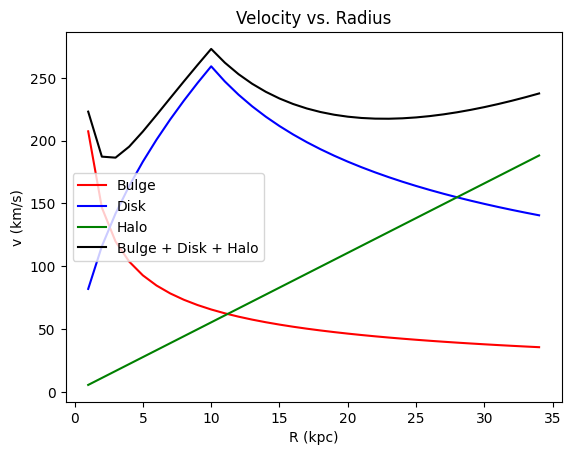

In [17]:
# Plot them all
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.plot(R_arr.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="black", label="Bulge + Disk + Halo") # plotting bulge + disk + halo components
plt.xlabel('R (kpc)') #labels x axis
plt.ylabel('v (km/s)') #labels y axis
plt.title("Velocity vs. Radius") #title of the plot
plt.legend() # to show the legend of a figure
plt.show()

In [18]:
# This dowallow you to download the file that contains the numbers nescessary for the overplotting found at:
# https://github.com/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotation_2006.txt
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [19]:
# Imports the file to read it and add it to our plot
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")


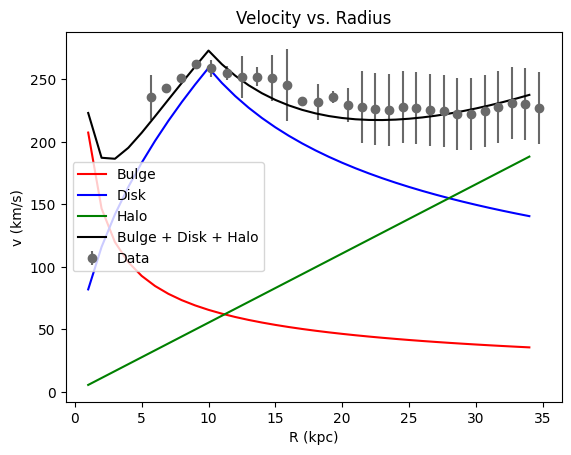

In [20]:

# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="dimgrey", color="dimgrey", fmt='o', label="Data")

# Overplot our calculations, basically copy and pater from the previous plotting coding cell
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.plot(R_arr.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="black", label="Bulge + Disk + Halo") # plotting bulge + disk components
plt.xlabel('R (kpc)') #labels x axis
plt.ylabel('v (km/s)') #labels y axis
plt.title("Velocity vs. Radius") #title of the plot
plt.legend() # to show the legend of a figure
plt.show()